# Logistic Regression using Optim.jl

Logistic Regression models a classification problem, in other words, the relationship between explanatory variables ($x$) and a dummy variable ($y$) whose value is either 1 or 0. 

The intuition is that we want to know $p(y = 1 \mid x)$, but if we use Linear Regression, $p(y = 1 \mid x)$ may be lager than 1, which is certainly not true.

We then need a function which outputs "probability", the more certain we are, the closer the output is to 1.

$$
\pi_{i} = p(y_i = 1 \mid x_i) = \frac{e^{\beta_0+\beta_1x_i1...\beta_jxij}}{1+e^{\beta_0+\beta_1x_i1...\beta_jxij}}
$$

or in vector form where we insert a constant term to $x$ which becomes $\begin{bmatrix}
1\\
x_1\\
\vdots \\ 
x_j\\
\end{bmatrix}$

$$
\pi_{i} = p(y_i = 1 \mid x_i) = \frac{e^{x_i^T\beta}}{1+e^{x_i^T\beta}}
$$

In the case where there is only one variable in $x$ , the function has a "S" shape.

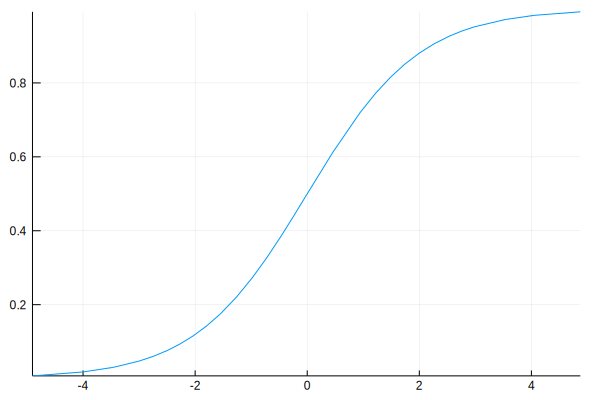

In [1]:
using Plots; gr()
plot(x->e^x/(1+e^x), legend=false)

In order to estimate the parameters ($\beta$), we then need maximizing the likelihood or log likelihood. We assume the sample size is $n$ and the data is i.i.d, therefore the log likelihood function is

\begin{align*} 
\ell(\beta)&=\sum_{i=1}^{n}[y_{i}\log(\pi_{i})+(1-y_{i})\log(1-\pi_{i})]\\ 
& = \sum_{i=1}^{n}[y_{i}x_i^T\beta - log(1+e^{x_i^T\beta})]
\end{align*}

We now generate some fake data and form the objective function. Because `Optim.jl` is used to **minimize** a function, we therefore need minimize negative likelihood function.

In [2]:
x = rand(10, 2)
x_const = hcat(ones(10), x)
y = [rand([1,0]) for i in 1:10]
l(β) = sum(y .* (x_const * β) - log.(e.^(x_const * β) .+ 1))
negative_l(β) = -l(β)

negative_l (generic function with 1 method)

In [3]:
#Pkg.add("Optim")
using Optim

In [4]:
optimize(negative_l, rand(3)) 

Results of Optimization Algorithm
 * Algorithm: Nelder-Mead
 * Starting Point: [0.31718896752503634,0.95649516059197, ...]
 * Minimizer: [6.373052193864922,-5.822492008421541, ...]
 * Minimum: 4.464386e+00
 * Iterations: 83
 * Convergence: true
   *  √(Σ(yᵢ-ȳ)²)/n < 1.0e-08: true
   * Reached Maximum Number of Iterations: false
 * Objective Calls: 153

In [5]:
optimize(negative_l, rand(3), LBFGS()) 

Results of Optimization Algorithm
 * Algorithm: L-BFGS
 * Starting Point: [0.5763499880559666,0.6546152778367522, ...]
 * Minimizer: [6.372458789503972,-5.82209898015666, ...]
 * Minimum: 4.464386e+00
 * Iterations: 11
 * Convergence: true
   * |x - x'| ≤ 1.0e-32: false 
     |x - x'| = 1.59e-07 
   * |f(x) - f(x')| ≤ 1.0e-32 |f(x)|: true
     |f(x) - f(x')| = 0.00e+00 |f(x)|
   * |g(x)| ≤ 1.0e-08: true 
     |g(x)| = 1.50e-11 
   * Stopped by an increasing objective: false
   * Reached Maximum Number of Iterations: false
 * Objective Calls: 32
 * Gradient Calls: 32

## TODO
- Use real dataset [Street et al, 1993](http://ftp.cs.wisc.edu/math-prog/tech-reports/olm102.ps) or MNIST
- Plot the data and the result
- Show difference between different methods